In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("D:/DS ML&AI/Capstone4/env/Scripts/PreProcessed.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [4]:
#converting Invoice date column type to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [28]:
df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
#calculate the total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.info()

In [6]:
df = df.sample(n=5000,random_state=42).reset_index(drop=True)

In [30]:
#df = df.drop(columns=["CustomerID", "InvoiceNo"], errors="ignore")

In [7]:
#applying standard scalar
from sklearn.preprocessing import StandardScaler

numerical_features = ["Quantity", "UnitPrice", "TotalPrice"]

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [31]:

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = df.select_dtypes(include=['float64', 'int64'])
# X_scaled = scaler.fit_transform(X)

In [33]:
#scaled_df = pd.DataFrame(X_scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns)

In [34]:
#final_df = pd.concat([scaled_df, df.select_dtypes(exclude=['float64', 'int64'])], axis=1)

In [ ]:
#final_df.head()

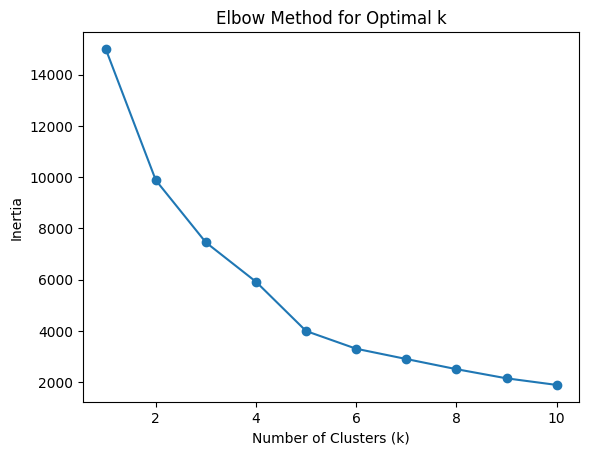

In [7]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [38]:
km.labels_

array([8, 8, 9, ..., 0, 8, 0], shape=(5000,), dtype=int32)

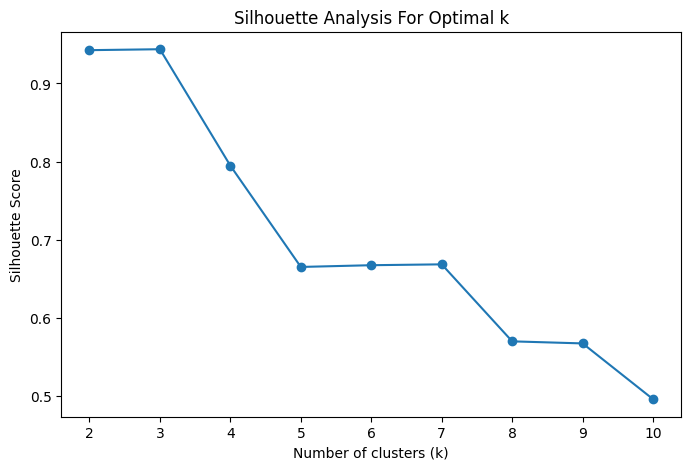

Best k based on silhouette score: 3


In [8]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K = range(2, 11)  # silhouette is undefined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Print best k
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k based on silhouette score: {best_k}")

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score 
# import matplotlib.pyplot as plt

# # Determine the optimal number of clusters using the Elbow Method
# score = []
# k_values = range(1, 11)

# for k in k_values:
#     km = KMeans(n_clusters=k, random_state=42)
#     label=km.fit_predict(df_scaled)
#     score.append(silhouette_score(df_scaled,label))

# # Plot the Elbow Method
# plt.plot(k_values, score, marker='o')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Apply K-Means clustering 
k_val = 4
kmeans = KMeans(n_clusters=k_val, random_state=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cluster
0,577022,82494L,WOODEN FRAME ANTIQUE WHITE,6,2023-11-17 12:42:00,2.95,13668.0,United Kingdom,17.7,0
1,556576,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2023-06-13 13:55:00,4.95,14606.0,United Kingdom,9.9,0
2,561923,21123,SET/10 IVORY POLKADOT PARTY CANDLES,24,2023-08-01 12:16:00,1.25,14112.0,United Kingdom,30.0,0
3,573511,22417,PACK OF 60 SPACEBOY CAKE CASES,24,2023-10-31 12:25:00,0.55,12347.0,Iceland,13.2,0
4,557893,23171,REGENCY TEA PLATE GREEN,12,2023-06-23 14:12:00,1.65,15228.0,United Kingdom,19.8,0
...,...,...,...,...,...,...,...,...,...,...
4995,539042,21931,JUMBO STORAGE BAG SUKI,10,2022-12-15 15:37:00,1.95,15062.0,United Kingdom,19.5,0
4996,553527,22917,HERB MARKER ROSEMARY,12,2023-05-17 14:57:00,0.65,15123.0,United Kingdom,7.8,0
4997,562031,22557,PLASTERS IN TIN VINTAGE PAISLEY,2,2023-08-01 17:37:00,1.65,16984.0,United Kingdom,3.3,0
4998,569225,82494L,WOODEN FRAME ANTIQUE WHITE,12,2023-10-02 14:25:00,2.95,16930.0,United Kingdom,35.4,0


In [12]:
df['Cluster'].unique()

array([0, 2, 3, 1], dtype=int32)

In [ ]:
# from sklearn.metrics import silhouette_score

# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=10)
#     labels = kmeans.fit_predict(df_scaled)
#     score = silhouette_score(df_scaled, labels)
#     print(f"k={k}, silhouette score={score:.4f}")

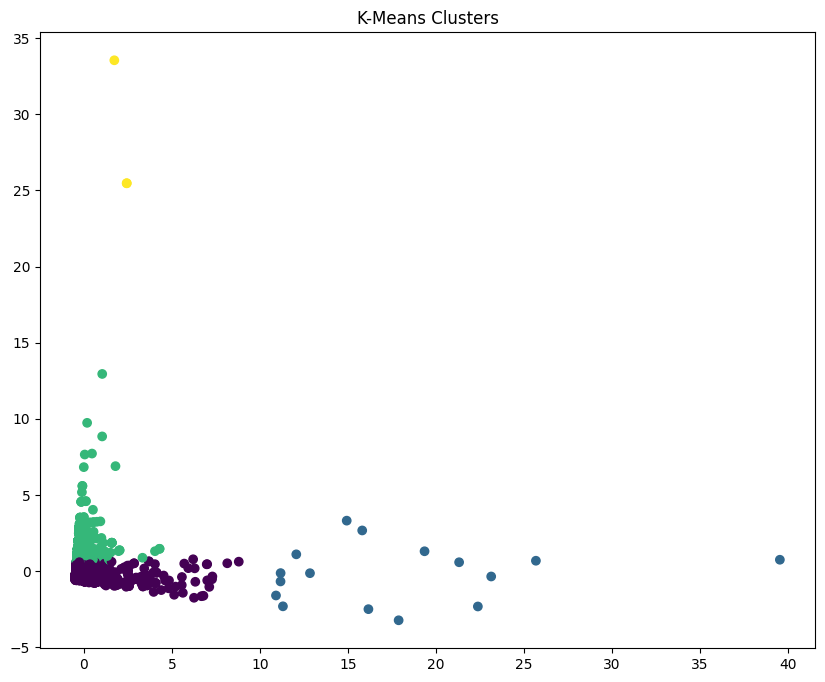

In [13]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_prod(prod_name, df, num_recommendations=5):
    # Get the cluster of the input product
    prod_cluster = df[df["Description"] == prod_name]["Cluster"].values[0]

    # Filter products from the same cluster
    same_cluster_prod = df[df["Cluster"] == prod_cluster].reset_index(drop=True)

    # Calculate similarity within the cluster
    prod_index = same_cluster_prod[same_cluster_prod["Description"] == prod_name].index[0]
    cluster_features = same_cluster_prod[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_prod = np.argsort(similarity[prod_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_prod.iloc[similar_prod][["Description"]]

    return recommendations

In [19]:
prod_cluster = df[df["Description"] == 'PACK OF 6 SKULL PAPER CUPS']["Cluster"].values[0]
print(prod_cluster)

0


In [28]:
same_cluster_prod = df[df["Cluster"] == 2].reset_index(drop=True)
same_cluster_prod

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cluster
0,545428,22423,REGENCY CAKESTAND 3 TIER,4,2023-03-02 14:43:00,12.75,14239.0,United Kingdom,51.00,2
1,578074,23491,VINTAGE JINGLE BELLS HEART,5,2023-11-22 16:06:00,8.25,17590.0,United Kingdom,41.25,2
2,543734,22926,IVORY GIANT GARDEN THERMOMETER,6,2023-02-11 12:22:00,5.95,17512.0,United Kingdom,35.70,2
3,581251,22193,RED DINER WALL CLOCK,2,2023-12-08 11:02:00,8.50,18210.0,United Kingdom,17.00,2
4,539590,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,12,2022-12-20 13:21:00,8.50,14733.0,United Kingdom,102.00,2
...,...,...,...,...,...,...,...,...,...,...
592,560451,22061,LARGE CAKE STAND HANGING STRAWBERY,2,2023-07-19 09:50:00,9.95,14911.0,EIRE,19.90,2
593,551655,21754,HOME BUILDING BLOCK WORD,1,2023-05-03 12:07:00,5.95,17757.0,United Kingdom,5.95,2
594,550835,21359,RELAX LARGE WOOD LETTERS,1,2023-04-21 10:52:00,15.95,15034.0,United Kingdom,15.95,2
595,552972,22847,BREAD BIN DINER STYLE IVORY,1,2023-05-12 13:43:00,16.95,16043.0,United Kingdom,16.95,2


In [34]:
prod_index = same_cluster_prod[same_cluster_prod["Description"] == 'RED DINER WALL CLOCK'].index[0]
prod_index

np.int64(3)

In [31]:
cluster_features = same_cluster_prod[numerical_features]
cluster_features

,Quantity,UnitPrice,TotalPrice
0,4,12.75,51.00
1,5,8.25,41.25
2,6,5.95,35.70
3,2,8.50,17.00
4,12,8.50,102.00
...,...,...,...
592,2,9.95,19.90
593,1,5.95,5.95
594,1,15.95,15.95
595,1,16.95,16.95


In [ ]:
similarity = cosine_similarity(cluster_features)
similarity

In [27]:
similarity.shape

(597, 597)

In [ ]:
similarity[prod_index]

In [36]:
similar_prod = np.argsort(similarity[prod_index])[-6:-1][::-1]
similar_prod

array([389, 544, 545, 283,  56])

In [37]:
input_prod=  "RED DINER WALL CLOCK"
recommended_prod = recommend_prod(input_prod, df, num_recommendations=5)

print(f"Products similar to '{input_prod}':")
recommended_prod

Products similar to 'RED DINER WALL CLOCK':


,Description
1243,LOVE BUILDING BLOCK WORD
996,HOME BUILDING BLOCK WORD
1425,LOVE BUILDING BLOCK WORD
4612,RED RETROSPOT APRON
4583,EDWARDIAN PARASOL NATURAL
